In [1]:
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
data1 = pd.read_excel('TomatoFeature_CO2.xlsx')
target = pd.read_excel('Tomatoes_Target_CO2_Scaled.xlsx')
x_train= data1.iloc [:8, : ]
y_train= data1.iloc [:8, 1]
x_test = data1.iloc [8 :, :]
y_test = data1.iloc [8 :, 1]
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
x_test = torch.tensor(x_test.values).float()
y_test = torch.tensor(y_test.values).float()

In [3]:
trainset = torch.utils.data.TensorDataset(x_train, y_train)
testset = torch.utils.data.TensorDataset(x_test, y_test)

In [4]:
from torch.utils.data import DataLoader
batch_size = 1
trainloader = DataLoader(trainset, batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size, shuffle=False)

In [5]:
import torch.nn as nn
import torch.nn.functional as F
net = nn.Linear(13, 1, bias=False)
weights = torch.tensor([[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
net.weight = nn.Parameter(weights, requires_grad=True)
net.weight

Parameter containing:
tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000, 0.1000, 0.1000, 0.1000]], requires_grad=True)

In [6]:
loss_fn = F.mse_loss 
#+ 0.0001*F.normalize(net.weight**2)
optimizer = torch.optim.SGD(net.parameters(), lr=0.0005)
loss_train = []
loss_test = []

for epoch in range(1000):
    net.train()
    train_loss_sum = 0.0
    for xb,yb in trainloader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss_sum += loss.item()
    train_loss_sum = train_loss_sum/8
    loss_train.append(train_loss_sum)
    print(f'epoch {epoch + 1}  trainlosssum: {train_loss_sum:.3f}')
        
        
    net.eval()
    with torch.no_grad():
        testing_loss = 0.0
        testing_loss_sum = 0.0
        for xb,yb in testloader:
            optimizer.zero_grad()
            pred = net(xb)
            loss = loss_fn(pred, yb)
            testing_loss_sum += loss.item()
        testing_loss_sum = testing_loss_sum/2
        loss_test.append(testing_loss_sum)
        print(f'epoch {epoch + 1}  testinglosssum: {testing_loss_sum:.3f}')
print('Finished Training')

C:\Users\shenyutao\AppData\Local\Temp\ipykernel_31352\2510847001.py:16: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(pred, yb)
C:\Users\shenyutao\AppData\Local\Temp\ipykernel_31352\2510847001.py:34: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(pred, yb)


epoch 1  trainlosssum: 0.011
epoch 1  testinglosssum: 0.074
epoch 2  trainlosssum: 0.011
epoch 2  testinglosssum: 0.072
epoch 3  trainlosssum: 0.010
epoch 3  testinglosssum: 0.069
epoch 4  trainlosssum: 0.010
epoch 4  testinglosssum: 0.067
epoch 5  trainlosssum: 0.009
epoch 5  testinglosssum: 0.065
epoch 6  trainlosssum: 0.009
epoch 6  testinglosssum: 0.062
epoch 7  trainlosssum: 0.009
epoch 7  testinglosssum: 0.060
epoch 8  trainlosssum: 0.008
epoch 8  testinglosssum: 0.058
epoch 9  trainlosssum: 0.008
epoch 9  testinglosssum: 0.056
epoch 10  trainlosssum: 0.007
epoch 10  testinglosssum: 0.054
epoch 11  trainlosssum: 0.007
epoch 11  testinglosssum: 0.053
epoch 12  trainlosssum: 0.007
epoch 12  testinglosssum: 0.051
epoch 13  trainlosssum: 0.006
epoch 13  testinglosssum: 0.049
epoch 14  trainlosssum: 0.006
epoch 14  testinglosssum: 0.048
epoch 15  trainlosssum: 0.006
epoch 15  testinglosssum: 0.046
epoch 16  trainlosssum: 0.006
epoch 16  testinglosssum: 0.045
epoch 17  trainlosssum: 0.

epoch 140  testinglosssum: 0.006
epoch 141  trainlosssum: 0.000
epoch 141  testinglosssum: 0.006
epoch 142  trainlosssum: 0.000
epoch 142  testinglosssum: 0.006
epoch 143  trainlosssum: 0.000
epoch 143  testinglosssum: 0.006
epoch 144  trainlosssum: 0.000
epoch 144  testinglosssum: 0.006
epoch 145  trainlosssum: 0.000
epoch 145  testinglosssum: 0.006
epoch 146  trainlosssum: 0.000
epoch 146  testinglosssum: 0.006
epoch 147  trainlosssum: 0.000
epoch 147  testinglosssum: 0.006
epoch 148  trainlosssum: 0.000
epoch 148  testinglosssum: 0.006
epoch 149  trainlosssum: 0.000
epoch 149  testinglosssum: 0.006
epoch 150  trainlosssum: 0.000
epoch 150  testinglosssum: 0.006
epoch 151  trainlosssum: 0.000
epoch 151  testinglosssum: 0.006
epoch 152  trainlosssum: 0.000
epoch 152  testinglosssum: 0.006
epoch 153  trainlosssum: 0.000
epoch 153  testinglosssum: 0.006
epoch 154  trainlosssum: 0.000
epoch 154  testinglosssum: 0.006
epoch 155  trainlosssum: 0.000
epoch 155  testinglosssum: 0.006
epoch 1

epoch 277  testinglosssum: 0.005
epoch 278  trainlosssum: 0.000
epoch 278  testinglosssum: 0.005
epoch 279  trainlosssum: 0.000
epoch 279  testinglosssum: 0.005
epoch 280  trainlosssum: 0.000
epoch 280  testinglosssum: 0.005
epoch 281  trainlosssum: 0.000
epoch 281  testinglosssum: 0.005
epoch 282  trainlosssum: 0.000
epoch 282  testinglosssum: 0.005
epoch 283  trainlosssum: 0.000
epoch 283  testinglosssum: 0.005
epoch 284  trainlosssum: 0.000
epoch 284  testinglosssum: 0.005
epoch 285  trainlosssum: 0.000
epoch 285  testinglosssum: 0.005
epoch 286  trainlosssum: 0.000
epoch 286  testinglosssum: 0.005
epoch 287  trainlosssum: 0.000
epoch 287  testinglosssum: 0.005
epoch 288  trainlosssum: 0.000
epoch 288  testinglosssum: 0.005
epoch 289  trainlosssum: 0.000
epoch 289  testinglosssum: 0.005
epoch 290  trainlosssum: 0.000
epoch 290  testinglosssum: 0.005
epoch 291  trainlosssum: 0.000
epoch 291  testinglosssum: 0.005
epoch 292  trainlosssum: 0.000
epoch 292  testinglosssum: 0.005
epoch 2

epoch 417  testinglosssum: 0.005
epoch 418  trainlosssum: 0.000
epoch 418  testinglosssum: 0.005
epoch 419  trainlosssum: 0.000
epoch 419  testinglosssum: 0.005
epoch 420  trainlosssum: 0.000
epoch 420  testinglosssum: 0.005
epoch 421  trainlosssum: 0.000
epoch 421  testinglosssum: 0.005
epoch 422  trainlosssum: 0.000
epoch 422  testinglosssum: 0.005
epoch 423  trainlosssum: 0.000
epoch 423  testinglosssum: 0.005
epoch 424  trainlosssum: 0.000
epoch 424  testinglosssum: 0.005
epoch 425  trainlosssum: 0.000
epoch 425  testinglosssum: 0.005
epoch 426  trainlosssum: 0.000
epoch 426  testinglosssum: 0.005
epoch 427  trainlosssum: 0.000
epoch 427  testinglosssum: 0.005
epoch 428  trainlosssum: 0.000
epoch 428  testinglosssum: 0.005
epoch 429  trainlosssum: 0.000
epoch 429  testinglosssum: 0.005
epoch 430  trainlosssum: 0.000
epoch 430  testinglosssum: 0.005
epoch 431  trainlosssum: 0.000
epoch 431  testinglosssum: 0.005
epoch 432  trainlosssum: 0.000
epoch 432  testinglosssum: 0.005
epoch 4

epoch 578  testinglosssum: 0.005
epoch 579  trainlosssum: 0.000
epoch 579  testinglosssum: 0.005
epoch 580  trainlosssum: 0.000
epoch 580  testinglosssum: 0.005
epoch 581  trainlosssum: 0.000
epoch 581  testinglosssum: 0.005
epoch 582  trainlosssum: 0.000
epoch 582  testinglosssum: 0.005
epoch 583  trainlosssum: 0.000
epoch 583  testinglosssum: 0.005
epoch 584  trainlosssum: 0.000
epoch 584  testinglosssum: 0.005
epoch 585  trainlosssum: 0.000
epoch 585  testinglosssum: 0.005
epoch 586  trainlosssum: 0.000
epoch 586  testinglosssum: 0.005
epoch 587  trainlosssum: 0.000
epoch 587  testinglosssum: 0.005
epoch 588  trainlosssum: 0.000
epoch 588  testinglosssum: 0.005
epoch 589  trainlosssum: 0.000
epoch 589  testinglosssum: 0.005
epoch 590  trainlosssum: 0.000
epoch 590  testinglosssum: 0.005
epoch 591  trainlosssum: 0.000
epoch 591  testinglosssum: 0.005
epoch 592  trainlosssum: 0.000
epoch 592  testinglosssum: 0.005
epoch 593  trainlosssum: 0.000
epoch 593  testinglosssum: 0.005
epoch 5

epoch 722  trainlosssum: 0.000
epoch 722  testinglosssum: 0.005
epoch 723  trainlosssum: 0.000
epoch 723  testinglosssum: 0.005
epoch 724  trainlosssum: 0.000
epoch 724  testinglosssum: 0.005
epoch 725  trainlosssum: 0.000
epoch 725  testinglosssum: 0.005
epoch 726  trainlosssum: 0.000
epoch 726  testinglosssum: 0.005
epoch 727  trainlosssum: 0.000
epoch 727  testinglosssum: 0.005
epoch 728  trainlosssum: 0.000
epoch 728  testinglosssum: 0.005
epoch 729  trainlosssum: 0.000
epoch 729  testinglosssum: 0.005
epoch 730  trainlosssum: 0.000
epoch 730  testinglosssum: 0.005
epoch 731  trainlosssum: 0.000
epoch 731  testinglosssum: 0.005
epoch 732  trainlosssum: 0.000
epoch 732  testinglosssum: 0.005
epoch 733  trainlosssum: 0.000
epoch 733  testinglosssum: 0.005
epoch 734  trainlosssum: 0.000
epoch 734  testinglosssum: 0.005
epoch 735  trainlosssum: 0.000
epoch 735  testinglosssum: 0.005
epoch 736  trainlosssum: 0.000
epoch 736  testinglosssum: 0.005
epoch 737  trainlosssum: 0.000
epoch 737

epoch 860  testinglosssum: 0.005
epoch 861  trainlosssum: 0.000
epoch 861  testinglosssum: 0.005
epoch 862  trainlosssum: 0.000
epoch 862  testinglosssum: 0.005
epoch 863  trainlosssum: 0.000
epoch 863  testinglosssum: 0.005
epoch 864  trainlosssum: 0.000
epoch 864  testinglosssum: 0.005
epoch 865  trainlosssum: 0.000
epoch 865  testinglosssum: 0.005
epoch 866  trainlosssum: 0.000
epoch 866  testinglosssum: 0.005
epoch 867  trainlosssum: 0.000
epoch 867  testinglosssum: 0.005
epoch 868  trainlosssum: 0.000
epoch 868  testinglosssum: 0.005
epoch 869  trainlosssum: 0.000
epoch 869  testinglosssum: 0.005
epoch 870  trainlosssum: 0.000
epoch 870  testinglosssum: 0.005
epoch 871  trainlosssum: 0.000
epoch 871  testinglosssum: 0.005
epoch 872  trainlosssum: 0.000
epoch 872  testinglosssum: 0.005
epoch 873  trainlosssum: 0.000
epoch 873  testinglosssum: 0.005
epoch 874  trainlosssum: 0.000
epoch 874  testinglosssum: 0.005
epoch 875  trainlosssum: 0.000
epoch 875  testinglosssum: 0.005
epoch 8

import matplotlib.pyplot as plt 
epochs = range(1,1001)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss(Tomato)')
plt.plot(epochs, loss_test, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
net.weight

Parameter containing:
tensor([[0.0833, 0.0824, 0.0790, 0.0790, 0.0790, 0.0844, 0.0933, 0.0941, 0.0809,
         0.0811, 0.0840, 0.0813, 0.0815]], requires_grad=True)

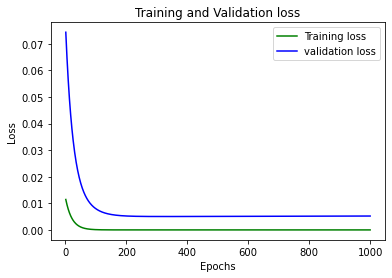

In [8]:
import matplotlib.pyplot as plt
epochs = range(1,1001)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.plot(epochs, loss_test, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()